# Importing Standard Libraries

In [1]:
from faker import Faker
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv(r"E:\Downloads\webmd.csv")

In [3]:
data1.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [4]:
data1.shape

(362806, 12)

# Creating name and race columns

In [5]:
#name column

In [6]:
df1 = Faker()

In [7]:
def create_names(n):
    name = []
    for _ in range(0,n):
        name.append(df1.name())
    return name   

In [8]:
name = create_names(362806)

In [9]:
df_name = pd.DataFrame(list(zip(name)),columns = ['Name'])

In [10]:
df_name.head()

,Name
0,James Washington
1,Daniel Ward
2,Todd Smith
3,Cynthia Martin
4,Melanie Snyder


In [11]:
df_name.shape

(362806, 1)

In [12]:
#race column

In [13]:
def weighted_cartesian_choice(*iterables):
    res = []
    for population, weights in iterables:
        weights = np.array(weights)/sum(weights)
        lst = np.random.choice(population,p=weights)
        res.append(lst)
    return res
race = (['Asian','White','Black','Hispanic'],[.32,.28,.22,.18])
list = []
for i in range(362806):
    res = weighted_cartesian_choice(race)
    list.append(res)

In [14]:
df_race=pd.DataFrame(list, columns = ['Race'])

In [15]:
df_race.head()

,Race
0,Hispanic
1,White
2,Black
3,White
4,White


# Concatenating the two columns

In [16]:
df_nr = pd.concat([df_name, df_race], axis=1).reindex(df_race.index)

# Final Dataset

In [17]:
drugs = pd.concat([df_nr, data1], axis=1).reindex(data1.index)

In [18]:
drugs.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,James Washington,Hispanic,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Daniel Ward,White,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Todd Smith,Black,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Cynthia Martin,White,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Melanie Snyder,White,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [19]:
#converting dataframe to csv file

In [20]:
drugs = drugs.to_csv('drugs_dataset.csv', index=False)

# Loading the dataset

In [21]:
data = pd.read_csv('drugs_dataset.csv')

In [22]:
data.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,James Washington,Hispanic,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Daniel Ward,White,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Todd Smith,Black,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Cynthia Martin,White,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Melanie Snyder,White,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


# Description of the Dataset

Name : Name of the patient

Race : Race of the patient

Age : Age of the patient

Condition : Condition/symptom from which the patient is suffering

Date : Date of usage

Drug : Name of the drug

DrugId : Identity/code of drug

EaseofUse : Patient's 10-Star rating on the ease of use of drug

Effectiveness : Patient's 10-Star rating on the effectiveness of drug

Reviews : Patient's review

Satisfaction : Patient's 10-Star rating on satisfaction

Sex : Gender of the patient

Sides : Side effects of the drug
    
UsefulCount : Number of users who found the review useful  

# Data Exploration

## Displaying first five rows of the dataset

In [23]:
data.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,James Washington,Hispanic,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Daniel Ward,White,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Todd Smith,Black,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Cynthia Martin,White,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Melanie Snyder,White,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


## Displaying the last five rows of the dataset

In [24]:
data.tail()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362801,Karen Atkinson,White,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,Michael Barajas,Black,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,Courtney James,Asian,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,William Madden,Asian,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,Brett Henry,Asian,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


## Information on the Dataset 

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362806 non-null  object
 1   Race           362806 non-null  object
 2   Age            362806 non-null  object
 3   Condition      362806 non-null  object
 4   Date           362806 non-null  object
 5   Drug           362806 non-null  object
 6   DrugId         362806 non-null  int64 
 7   EaseofUse      362806 non-null  int64 
 8   Effectiveness  362806 non-null  int64 
 9   Reviews        362769 non-null  object
 10  Satisfaction   362806 non-null  int64 
 11  Sex            362806 non-null  object
 12  Sides          362806 non-null  object
 13  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


### Insight

The info() method provides a summary of the dataset, offering essential information such as column types, non-null values, and memory usage. In this dataset, there are 9 categorical variables and 5 integer variables.

In [26]:
data.shape

(362806, 14)

### Insight

The dataset consists of 362806 rows and 14 columns

## Checking for NULL values

In [27]:
data.isna().sum()

Name              0
Race              0
Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

### Insight

The column Reviews has 37 missing values

## Datatypes

In [28]:
data.dtypes

Name             object
Race             object
Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

### Insight

The dataset consists of five integer-type fields and nine object-type fields.

## Descriptive Statistics

In [29]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


### Insight 

Displays the summary statistics such as count, mean, standard deviation, minimum and maximum value, first, second and third quartile values.

## Summary Statistics - Objective Datatype

In [30]:
data.describe(include='object').T

,count,unique,top,freq
Name,362806,181165,Michael Smith,186
Race,362806,4,Asian,116085
Age,362806,12,45-54,80043
Condition,362806,1806,Other,49765
Date,362806,4524,10/29/2007,404
Drug,362806,7093,cymbalta,4648
Reviews,362769,250167,,41824
Sex,362806,3,Female,238226
Sides,362806,1651,,17460


### Insight 

The age group between 45 to 54 has the highest representation.

Female patients outnumber male patients.

Among the drugs, Cymbalta is the most frequently used.

## Checking for duplicate values

In [31]:
data.duplicated().sum()

0

### Insight

There are no duplicate values present in the dataset

## Column Names

In [32]:
data.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

## Unique Occurences of each variable

In [33]:
for i in data.columns:
    print(i,':',data[i].nunique(),'\n')

Name : 181165 

Race : 4 

Age : 12 

Condition : 1806 

Date : 4524 

Drug : 7093 

DrugId : 6572 

EaseofUse : 7 

Effectiveness : 7 

Reviews : 250167 

Satisfaction : 7 

Sex : 3 

Sides : 1651 

UsefulCount : 148 



### Insight

The column 'Sex' has three categories

There are four different races present

'Drug' has more values than 'DrugId'

'Condition' has lesser values than 'Drug'/'DrugId'.

'Reviews' has close to 70% unique values.

## Creating the list of Categorical Values

In [34]:
cat_var = []

for column in data:
    if data[column].dtype == 'O':
        cat_var.append(column)
cat_var

['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'Reviews', 'Sex', 'Sides']

In [35]:
# finding the unique values in each categorical variables
for col in cat_var:
    print('\n', col, '\n', data[col].unique(), '\n', '_' * 80)


 Name 
 ['James Washington' 'Daniel Ward' 'Todd Smith' ... 'Vanessa Escobar'
 'Jesus Gamble' 'Brett Henry'] 
 ________________________________________________________________________________

 Race 
 ['Hispanic' 'White' 'Black' 'Asian'] 
 ________________________________________________________________________________

 Age 
 ['75 or over' '25-34' '65-74' '35-44' '55-64' '45-54' '19-24' ' ' '13-18'
 '7-12' '0-2' '3-6'] 
 ________________________________________________________________________________

 Condition 
 ['Stuffy Nose' 'Cold Symptoms' 'Other' ...
 'Combative and Explosive Behavior' 'Lead Poisoning'
 'Poisoning from Swallowed Unknown Substance'] 
 ________________________________________________________________________________

 Date 
 ['9/21/2014' '1/13/2011' '7/16/2012' ... '10/25/2019' '6/22/2019'
 '10/19/2019'] 
 ________________________________________________________________________________

 Drug 
 ['25dph-7.5peh' 'warfarin (bulk) 100 % powder' 'wymzya fe' ...
 'chest 

In [36]:
data['Name'].value_counts()

Michael Smith      186
Michael Johnson    138
John Smith         125
Jennifer Smith     117
David Smith        112
                  ... 
Yvonne Nelson        1
Haley Mann           1
Edgar Brewer         1
Janet Mendez         1
Brett Henry          1
Name: Name, Length: 181165, dtype: int64

In [37]:
data['Race'].value_counts()

Asian       116085
White       101557
Black        79802
Hispanic     65362
Name: Race, dtype: int64

In [38]:
data['Age'].value_counts()

45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
              12202
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64

In [39]:
data['Date'].value_counts()

10/29/2007    404
10/30/2007    316
10/28/2007    315
3/15/2010     308
3/16/2010     295
             ... 
10/19/2019      2
10/27/2019      1
10/20/2019      1
6/28/2019       1
6/22/2019       1
Name: Date, Length: 4524, dtype: int64

In [40]:
data['Drug'].value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

In [41]:
data['DrugId'].value_counts()

6873      8538
1025      7868
6007      7728
4398      5864
14208     5451
          ... 
4118         1
165948       1
54215        1
154021       1
149247       1
Name: DrugId, Length: 6572, dtype: int64

In [42]:
data['EaseofUse'].value_counts()

5     192650
4      74732
3      41303
1      35927
2      18191
6          2
10         1
Name: EaseofUse, dtype: int64

In [43]:
data['Effectiveness'].value_counts()

5     130388
4      81821
3      60406
1      59387
2      30801
6          2
10         1
Name: Effectiveness, dtype: int64

In [44]:
data['Reviews'].value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           41824
good                                                                                                                                                                                                                                                                                                                                                   

In [45]:
data['Satisfaction'].value_counts()

5     111550
1     100901
4      63158
3      51852
2      35342
6          2
10         1
Name: Satisfaction, dtype: int64

In [46]:
data['Sex'].value_counts()

Female    238226
Male       98043
           26537
Name: Sex, dtype: int64

In [47]:
data['Sides'].value_counts()

                                                                                                                                                       17460
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                          15563
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.       12116
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                 9162
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.              7790
                                                                                                                                                       ...  
Nausea ,  vomiting ,  stomach / abdominal pain , gas,  dia

In [48]:
data['UsefulCount'].value_counts()

0      71608
1      46240
2      34701
3      27307
4      22862
       ...  
136        1
178        1
176        1
169        1
95         1
Name: UsefulCount, Length: 148, dtype: int64

In [49]:
data['Condition'].value_counts()

Other                                                  49765
Pain                                                   25232
High Blood Pressure                                    23275
Depression                                             14509
Birth Control                                          12253
                                                       ...  
Diagnostic Test for Myasthenia Gravis                      1
Myelodysplastic Syndrome with 5q Deletion Gene Type        1
Hunter Syndrome                                            1
Increased Uric Acid due to Cancer Chemotherapy             1
Adverse Effect of Benzodiazepine-Based Tranquilizer        1
Name: Condition, Length: 1806, dtype: int64

In [50]:
data['Drug'].value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

##  Selection of Drug

### A specific drug known as Topamax is selected for building the classification model to predict the side effects, which is identified by DrugId 14494

In [51]:
drug_topamax= data.loc[(data['Drug'] =='topamax')]
drug_topamax.head(5)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
191568,Ann Harvey,Asian,45-54,Migraine Prevention,9/22/2019,topamax,14494,4,4,"I was on this drug for 5 years, 100mg for the ...",1,,"Tiredness, drowsiness, dizziness , loss of co...",5
191575,Roger Yu,Asian,35-44,Simple Partial Seizures,9/2/2019,topamax,14494,4,4,I have partial seizures. It didn't help for a ...,4,,"Tiredness, drowsiness, dizziness , loss of co...",0
191582,Wayne Thompson,Asian,13-18,Migraine Prevention,8/9/2019,topamax,14494,1,1,I have been having migraines and headaches eve...,1,,"Tiredness, drowsiness, dizziness , loss of co...",6
191589,Gilbert Hubbard,White,65-74,Essential Tremor,7/21/2019,topamax,14494,4,4,This is the only medication I have taken for t...,3,,"Tiredness, drowsiness, dizziness , loss of co...",0
191596,Jacob Li,Asian,45-54,Migraine Prevention,4/30/2019,topamax,14494,5,5,I suffered from debilitating Cluster Headaches...,5,,"Tiredness, drowsiness, dizziness , loss of co...",2


In [52]:
drug_topamax.shape

(2148, 14)

In [53]:
drug_topamax['Condition'].value_counts()

Migraine Prevention                                1380
Other                                               460
Simple Partial Seizures                              68
Convulsive Seizures                                  63
Tonic-Clonic Epilepsy                                48
Additional Medication to Treat Partial Seizures      48
Habit of Drinking Too Much Alcohol                   27
Essential Tremor                                     24
Additional Medication for Tonic-Clonic Epilepsy      15
Involuntary Quivering                                10
Epilepsy of the Lennox Gastaut Syndrome               4
Binge Eating Disorder                                 1
Name: Condition, dtype: int64

In [54]:
drug_topamax['Condition'].value_counts().sum()

2148

In [55]:
data_new = drug_topamax.copy()

In [56]:
data_copy = data.copy()

# Data Pre-processing

## 1. Handling Whitespaces

In [57]:
# Handling instances with whitespaces
for i in data_new:
    data_new[i]=np.where(data_new[i]==" ",np.NAN,data_new[i])

In [58]:
data_new.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
191568,Ann Harvey,Asian,45-54,Migraine Prevention,9/22/2019,topamax,14494.0,4.0,4.0,"I was on this drug for 5 years, 100mg for the ...",1.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",5.0
191575,Roger Yu,Asian,35-44,Simple Partial Seizures,9/2/2019,topamax,14494.0,4.0,4.0,I have partial seizures. It didn't help for a ...,4.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",0.0
191582,Wayne Thompson,Asian,13-18,Migraine Prevention,8/9/2019,topamax,14494.0,1.0,1.0,I have been having migraines and headaches eve...,1.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",6.0
191589,Gilbert Hubbard,White,65-74,Essential Tremor,7/21/2019,topamax,14494.0,4.0,4.0,This is the only medication I have taken for t...,3.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",0.0
191596,Jacob Li,Asian,45-54,Migraine Prevention,4/30/2019,topamax,14494.0,5.0,5.0,I suffered from debilitating Cluster Headaches...,5.0,NaN,"Tiredness, drowsiness, dizziness , loss of co...",2.0


## 2. Missing Values

In [59]:
#checking missing values
data_new.isnull().sum()

Name               0
Race               0
Age               75
Condition          0
Date               0
Drug               0
DrugId             0
EaseofUse          0
Effectiveness      0
Reviews          200
Satisfaction       0
Sex              103
Sides              0
UsefulCount        0
dtype: int64

In [60]:
data_new.shape

(2148, 14)

## Bar Plot of Null Value Counts for Each Feature

Text(0.5, 1.0, 'Total Missing Values')

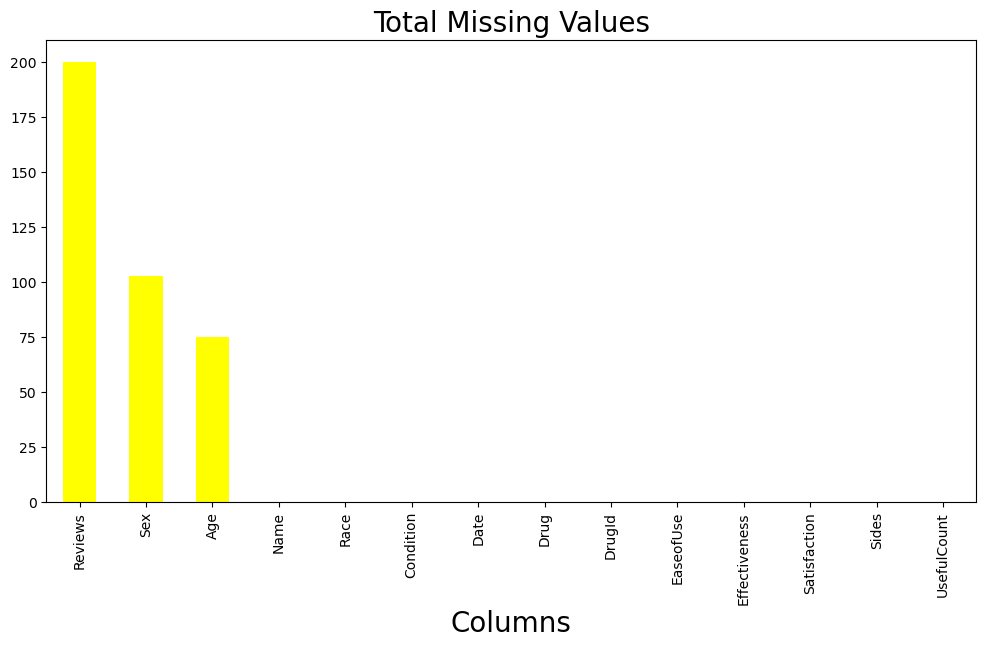

In [61]:
missing = (data_new.isnull().sum()).sort_values(ascending=False)
missing.plot(kind="bar", figsize = (12,6), fontsize = 10, color='yellow')
plt.xlabel("Columns", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [62]:
# Removing rows with null data
data_new=data_new.dropna(axis=0)

In [63]:
data_new.isnull().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [64]:
data_new.shape

(1830, 14)

## 3. Test Processing

In [65]:
# converting rows having data other than string datatype into  string.
for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Sides']) != str:
        data_new.iloc[i]['Sides'] = str(data_new.iloc[i]['Sides'])

for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Reviews']) != str:
        data_new.iloc[i]['Reviews'] = str(data_new.iloc[i]['Reviews'])
        
for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Condition']) != str:
        data_new.iloc[i]['Condition'] = str(data_new.iloc[i]['Condition'])

In [66]:
import re
def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower()
    i = re.sub("[0-9" "]+"," ",i)
    i= re.sub("[\W+""]", " ",i)        
    w = []
    for word in i.split(" "):
        if len(word)>3:
            w.append(word)
    return (" ".join(w))

## 3.1 Sides

In [67]:
data_new.Sides= data_new.Sides.apply(cleaning_text)
data_new.Sides

191610    tiredness drowsiness dizziness loss coordinati...
191624    tiredness drowsiness dizziness loss coordinati...
191631    tiredness drowsiness dizziness loss coordinati...
191638    tiredness drowsiness dizziness loss coordinati...
191645    tiredness drowsiness dizziness loss coordinati...
                                ...                        
197200    tiredness drowsiness dizziness loss coordinati...
197201    tiredness drowsiness dizziness loss coordinati...
197202    tiredness drowsiness dizziness loss coordinati...
197203    tiredness drowsiness dizziness loss coordinati...
197204    tiredness drowsiness dizziness loss coordinati...
Name: Sides, Length: 1830, dtype: object

In [68]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data_new['Reviews'] = data_new['Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jainy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
data_new['Sides']

191610    tiredness drowsiness dizziness loss coordinati...
191624    tiredness drowsiness dizziness loss coordinati...
191631    tiredness drowsiness dizziness loss coordinati...
191638    tiredness drowsiness dizziness loss coordinati...
191645    tiredness drowsiness dizziness loss coordinati...
                                ...                        
197200    tiredness drowsiness dizziness loss coordinati...
197201    tiredness drowsiness dizziness loss coordinati...
197202    tiredness drowsiness dizziness loss coordinati...
197203    tiredness drowsiness dizziness loss coordinati...
197204    tiredness drowsiness dizziness loss coordinati...
Name: Sides, Length: 1830, dtype: object

## 3.2 Reviews

In [70]:
data_new.review= data_new.Reviews.apply(cleaning_text)
data_new.review

191610    years medication when mild seizure neurologist...
191624    topamax chronic vomiting took weeks quit could...
191631    taking gabapentin central neuropathy wondering...
191638    taking topamax exactly four years migraine pre...
191645    suffer spinal degeneration supposed daily phys...
                                ...                        
197200    first weeks felt great took ptsd symptoms away...
197201    tried everything help migrianes nothing worked...
197202    rash around neck started taking topamax wonder...
197203    read reviews happy realize going crazy alone t...
197204    topamax worked great started short term memory...
Name: Reviews, Length: 1830, dtype: object

### Removing Stopwords

In [71]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data_new['Reviews'] = data_new['Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jainy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
data_new['Reviews']

191610    I'm 30 years old, I 12 I put medication. When ...
191624    I put 50mg day topamax chronic vomiting. I too...
191631    I'm taking Gabapentin Central Neuropathy!! I w...
191638    I taking Topamax exactly four years migraine p...
191645    I suffer spinal degeneration I supposed daily ...
                                ...                        
197200    The first 3 weeks I felt great---it took lot P...
197201    I tried everything help migrianes. Nothing wor...
197202    I rash around neck I started taking Topamax. I...
197203    I read reviews happy realize "I" going crazy a...
197204    Topamax worked great, I started short term mem...
Name: Reviews, Length: 1830, dtype: object

## 3.3 Condition

In [73]:
data_new.Condition=data_new.Condition.apply(cleaning_text)
data_new.Condition

191610    simple partial seizures
191624                      other
191631                      other
191638        migraine prevention
191645                      other
                   ...           
197200                      other
197201        migraine prevention
197202                      other
197203    simple partial seizures
197204        migraine prevention
Name: Condition, Length: 1830, dtype: object

## 4. Gender

In [74]:
data_new['Sex'].value_counts()

Female    1669
Male       161
Name: Sex, dtype: int64

# 5. Handling Age Group

In [75]:
data_new['Age'].value_counts()

45-54         463
35-44         455
25-34         423
55-64         196
19-24         184
13-18          51
65-74          37
7-12            8
75 or over      8
3-6             3
0-2             2
Name: Age, dtype: int64

In [76]:
data_new['Age'].unique()

array(['7-12', '25-34', '45-54', '65-74', '55-64', '35-44', '19-24',
       '13-18', '75 or over', '3-6', '0-2'], dtype=object)

In [77]:
data_new['Age']=data_new['Age'].str.replace('75 or over','75-100')

In [78]:
data_new['Age'].value_counts()

45-54     463
35-44     455
25-34     423
55-64     196
19-24     184
13-18      51
65-74      37
7-12        8
75-100      8
3-6         3
0-2         2
Name: Age, dtype: int64

# 6. Outliers Detection

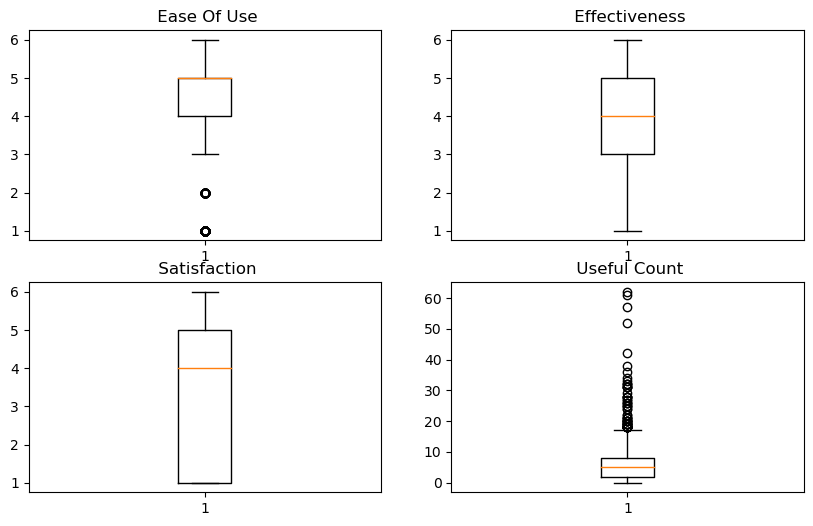

In [79]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_new["EaseofUse"])
plt.title(" Ease Of Use")

plt.subplot(2,2,2)
plt.boxplot(data_new["Effectiveness"])
plt.title(" Effectiveness")

plt.subplot(2,2,3)
plt.boxplot(data_new["Satisfaction"])
plt.title(" Satisfaction")

plt.subplot(2,2,4)
plt.boxplot(data_new["UsefulCount"])
plt.title(" Useful Count")
plt.show()

### Insight

There are outliers present in EaseofUse and UsefulCount columns.

## 7. Removing Outliers

In [80]:
#function called 'outliers' which returns a list of outliers
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
#create list to store indexes of outliers
    ls= df.index[(df[ft]<lower) | (df[ft]>upper)]
    return ls

In [81]:
#create an empty list to store indexes from multiple columns
index_list=[]
for feature in ['UsefulCount', 'EaseofUse']:
    index_list.extend(outliers(data_new,feature))
index_list

[191785,
 191911,
 191925,
 191939,
 192009,
 192016,
 192023,
 192030,
 192058,
 192275,
 192317,
 192492,
 192888,
 193037,
 193082,
 193286,
 193316,
 193319,
 193337,
 193340,
 193472,
 193502,
 193505,
 193508,
 193520,
 193535,
 193571,
 194130,
 194146,
 194264,
 194282,
 194300,
 194336,
 194344,
 194390,
 194496,
 194740,
 194818,
 194890,
 194914,
 194946,
 195358,
 195382,
 195420,
 195448,
 195494,
 195526,
 195940,
 195988,
 196040,
 196076,
 196134,
 196162,
 196340,
 196400,
 196410,
 196510,
 196756,
 196774,
 197000,
 197184,
 197188,
 197198,
 191624,
 191631,
 191757,
 191862,
 191911,
 191939,
 192128,
 192135,
 192142,
 192163,
 192219,
 192226,
 192289,
 192303,
 192317,
 192324,
 192457,
 192485,
 192499,
 192527,
 192548,
 192674,
 192737,
 192779,
 192800,
 192929,
 192959,
 192965,
 193022,
 193025,
 193031,
 193055,
 193085,
 193118,
 193124,
 193151,
 193178,
 193274,
 193331,
 193352,
 193394,
 193436,
 193445,
 193514,
 193517,
 193586,
 193607,
 193616,
 

In [82]:
#define a function called 'remove' which returns a cleaned data without outliers
def remove(df,ls):
    ls=sorted(set(ls)) #to sort and remove multiple copies(to get unique)
    df=df.drop(ls)
    return df

In [83]:
data_new.shape

(1830, 14)

In [84]:
data_new = remove(data_new, index_list)

In [85]:
data_new.shape

(1548, 14)

## UsefulCount and EaseofUse columns post Outliers Removal

Text(0.5, 1.0, 'Box plot of Useful Count')

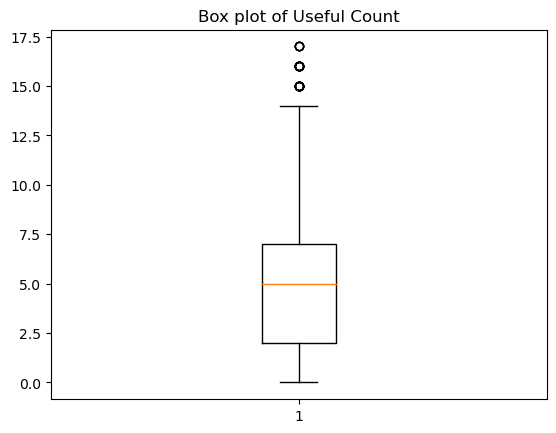

In [86]:
plt.boxplot(data_new["UsefulCount"])
plt.title('Box plot of Useful Count')

Text(0.5, 1.0, 'Box plot of Ease Of Use')

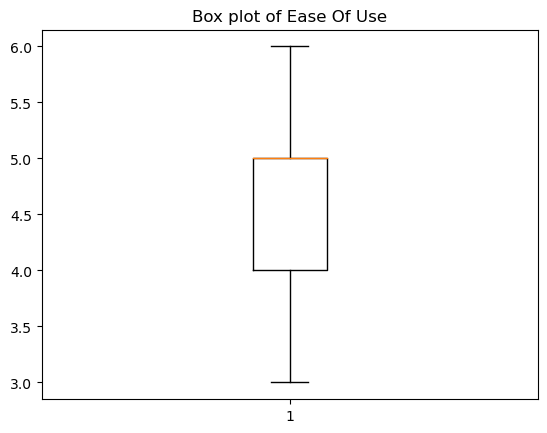

In [87]:
plt.boxplot(data_new["EaseofUse"])
plt.title('Box plot of Ease Of Use')

## Satisfaction Column

In [88]:
data_new['Satisfaction'].value_counts()

5.0    545
4.0    334
1.0    309
3.0    229
2.0    130
6.0      1
Name: Satisfaction, dtype: int64

In [89]:
data_new[data_new['Satisfaction'] > 5]

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
195282,Joseph Peterson,White,35-44,migraine prevention,5/18/2009,topamax,14494.0,6.0,6.0,ahoj som zo slovenska dlhe roky mam migreny tu...,6.0,Female,tiredness drowsiness dizziness loss coordinati...,0.0


### Deleting Values greater than 5 from Satisfaction Column

In [90]:
data_new.drop(labels = data_new[data_new['Satisfaction'] == 6].index, axis = 0, inplace = True)
data_new[data_new['Satisfaction'] == 6]

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount


## 8. Feature Engineering

### Creation of a new SideEffects column

In [91]:
data1=np.where(data_new['Satisfaction'] == 1.0, "Nil", data_new['Satisfaction'])
data1=np.where(data_new['Satisfaction'] == 2.0, "Mild",data1)
data1=np.where(data_new['Satisfaction'] == 3.0, "Moderate", data1)
data1=np.where(data_new['Satisfaction'] == 4.0, "Severe", data1)
data1=np.where(data_new['Satisfaction'] == 5.0, "Extreme",data1)

In [92]:
data_new['SideEffects']=data1

In [93]:
#Since DrugId is the same, the column is removed

In [94]:
data_new.drop(['Satisfaction','DrugId'], inplace=True, axis=1)

In [95]:
data_new.head()

,Name,Race,Age,Condition,Date,Drug,EaseofUse,Effectiveness,Reviews,Sex,Sides,UsefulCount,SideEffects
191610,Juan Bailey,Hispanic,7-12,simple partial seizures,2/26/2019,topamax,4.0,5.0,"I'm 30 years old, I 12 I put medication. When ...",Male,tiredness drowsiness dizziness loss coordinati...,0.0,Extreme
191638,Stephanie Yang,Hispanic,65-74,migraine prevention,6/22/2014,topamax,5.0,5.0,I taking Topamax exactly four years migraine p...,Female,tiredness drowsiness dizziness loss coordinati...,9.0,Extreme
191645,Roy Wood,Black,55-64,other,12/27/2018,topamax,5.0,5.0,I suffer spinal degeneration I supposed daily ...,Female,tiredness drowsiness dizziness loss coordinati...,0.0,Extreme
191652,Nicole Reyes,Asian,45-54,migraine prevention,12/17/2018,topamax,5.0,3.0,I taking 50 mg 2x day since 11/30/18. The firs...,Female,tiredness drowsiness dizziness loss coordinati...,7.0,Mild
191659,Melinda Morales,Asian,25-34,tonic clonic epilepsy,10/18/2018,topamax,5.0,5.0,The important thin I want say Topamax medicine...,Male,tiredness drowsiness dizziness loss coordinati...,1.0,Extreme


In [96]:
#data_new.to_csv('drug_topamax_eda.csv', index=False)

In [97]:
data_copy = data_new.copy()

## 9. Feature Reduction

### Correlation Analysis

In [98]:
#Correlation matrix is plotted to check the relationship between variables

<Axes: >

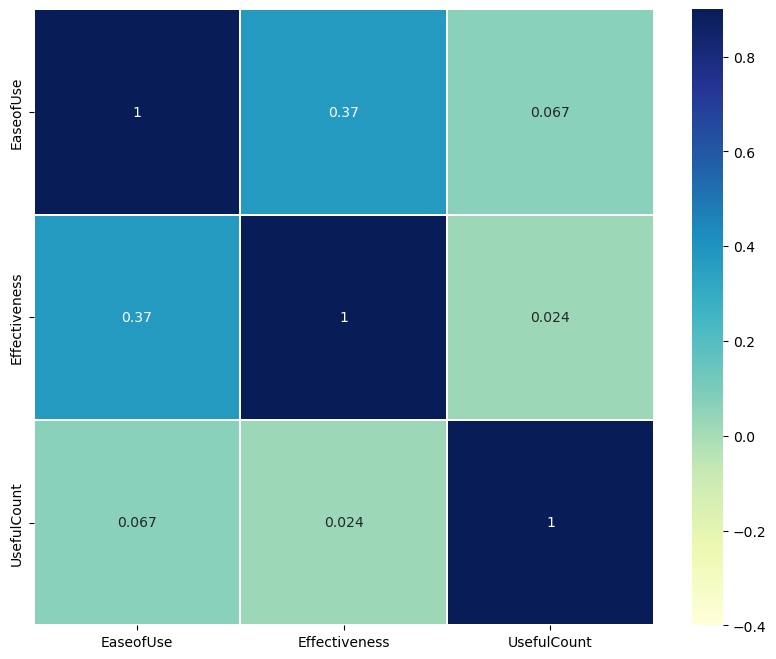

In [99]:
corrmatrix = data_new.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

In [100]:
#In this step, we removed the common columns like 'Drug,' 'Sides,' as well as other unrelated columns including 'Date,' 'Name,' 'Reviews,' and 'UsefulCount' since they are not related to drug side effects.

In [101]:
data_new=data_new.drop(columns = ['Name','Drug','Date','Sides','Reviews','UsefulCount'],axis=1)
data_new=data_new.reset_index(drop=True)
data_new.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,Hispanic,7-12,simple partial seizures,4.0,5.0,Male,Extreme
1,Hispanic,65-74,migraine prevention,5.0,5.0,Female,Extreme
2,Black,55-64,other,5.0,5.0,Female,Extreme
3,Asian,45-54,migraine prevention,5.0,3.0,Female,Mild
4,Asian,25-34,tonic clonic epilepsy,5.0,5.0,Male,Extreme


In [102]:
data_new.shape

(1547, 7)

## 10. Encoding

In [103]:
#Finding categorical columns and chnaging datatype
for cl in data_new.select_dtypes(include = ['object']):
    data_new[cl]=data_new[cl].astype('category')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Race           1547 non-null   category
 1   Age            1547 non-null   category
 2   Condition      1547 non-null   category
 3   EaseofUse      1547 non-null   float64 
 4   Effectiveness  1547 non-null   float64 
 5   Sex            1547 non-null   category
 6   SideEffects    1547 non-null   category
dtypes: category(5), float64(2)
memory usage: 33.1 KB


In [104]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [105]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Race           1547 non-null   category
 1   Age            1547 non-null   category
 2   Condition      1547 non-null   category
 3   EaseofUse      1547 non-null   float64 
 4   Effectiveness  1547 non-null   float64 
 5   Sex            1547 non-null   category
 6   SideEffects    1547 non-null   category
dtypes: category(5), float64(2)
memory usage: 33.1 KB


In [106]:
data_new.columns

Index(['Race', 'Age', 'Condition', 'EaseofUse', 'Effectiveness', 'Sex',
       'SideEffects'],
      dtype='object')

In [107]:
data_new.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,Hispanic,7-12,simple partial seizures,4.0,5.0,Male,Extreme
1,Hispanic,65-74,migraine prevention,5.0,5.0,Female,Extreme
2,Black,55-64,other,5.0,5.0,Female,Extreme
3,Asian,45-54,migraine prevention,5.0,3.0,Female,Mild
4,Asian,25-34,tonic clonic epilepsy,5.0,5.0,Male,Extreme


In [108]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
#for col in ['SideEffects', 'Drug','Age','Sex']:
for col in ['Race','Age','Sex','Condition','SideEffects']:   
    data_new[col]=label.fit_transform((data_new[col]).astype(str))
    
data_label=data_new

In [109]:
data_new.head()

,Race,Age,Condition,EaseofUse,Effectiveness,Sex,SideEffects
0,2,9,10,4.0,5.0,1,0
1,2,8,8,5.0,5.0,0,0
2,1,7,9,5.0,5.0,0,0
3,0,6,8,5.0,3.0,0,1
4,0,3,11,5.0,5.0,1,0


In [110]:
data_new.shape

(1547, 7)

## 11. Scaling

In [111]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scale=['Effectiveness','EaseofUse']
data_new[scale] = ss.fit_transform(data_new[scale])

In [112]:
data_new.shape

(1547, 7)

In [113]:
#data_new.to_csv('drug_topamax_modelling.csv', index=False)

In [114]:
data_model = data_new.copy()

# Exploratory Data Analysis

## 1. Top 20 Drugs

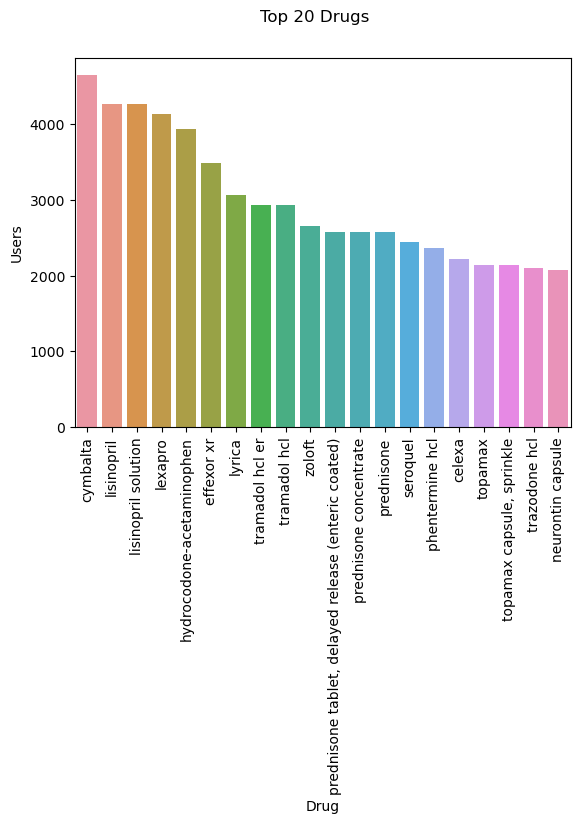

In [115]:
data1= data['Drug'].value_counts().head(20).reset_index()
data1.columns = ['Drug', 'Users']
sns.barplot(data=data1, x = 'Drug', y = 'Users')
plt.suptitle("Top 20 Drugs")
plt.xticks(rotation=90,fontsize=10)
plt.show()

Out of more than 7000 drugs, there are twenty features, each having a minimum user count of over 2250. Among them, Cymbalta stands out with the highest number of users.

## 2. Top 20 Conditions

Text(0, 0.5, 'Users')

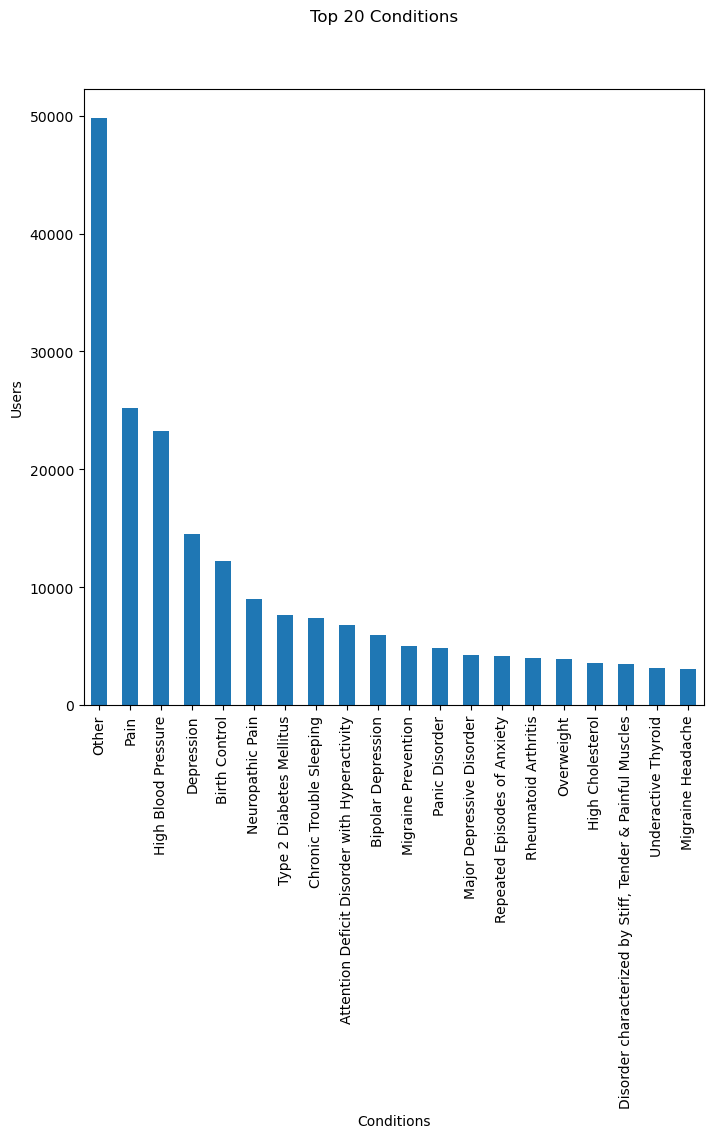

In [116]:
data['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(8,8))
plt.suptitle("Top 20 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

Among the 1806 recorded conditions, "Other Conditions" holds the highest frequency, followed by "Pain" and "High Blood Pressure" in descending order. With this general data interpretation accomplished, we will now proceed by narrowing our focus to a specific drug, Topamax, which ranks among the top 20 drugs in the dataset, aligning with the project's objectives.

## 3. Conditions - Topamax

Text(0, 0.5, 'Count')

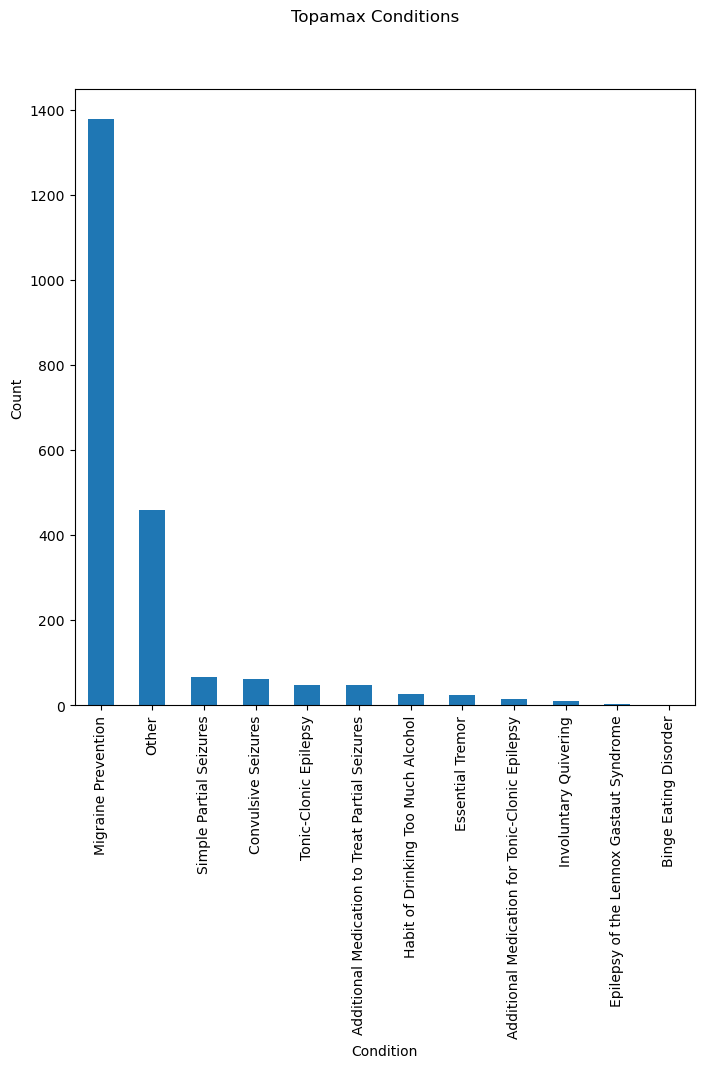

In [117]:
drug_topamax['Condition'].value_counts().nlargest(12).plot(kind='bar',figsize=(8,8))
plt.suptitle("Topamax Conditions")
plt.xlabel('Condition')
plt.ylabel('Count')

Topamax is used in the treatment of 12 conditions. Maximum users consume the drug for migraine prevention.

## 4. Users by Gender - Topamax

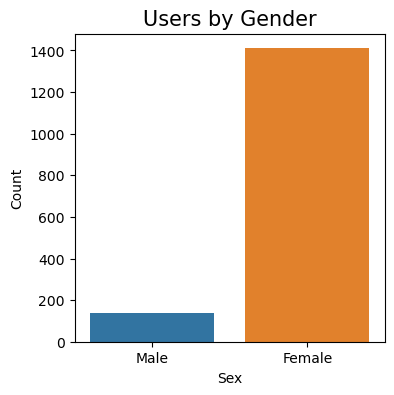

In [118]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='Sex', data=data_copy)
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count') 
plt.show()

The number of females exceeds the number of males.

## 5. Users by Race - Topamax

Text(0, 0.5, 'Count')

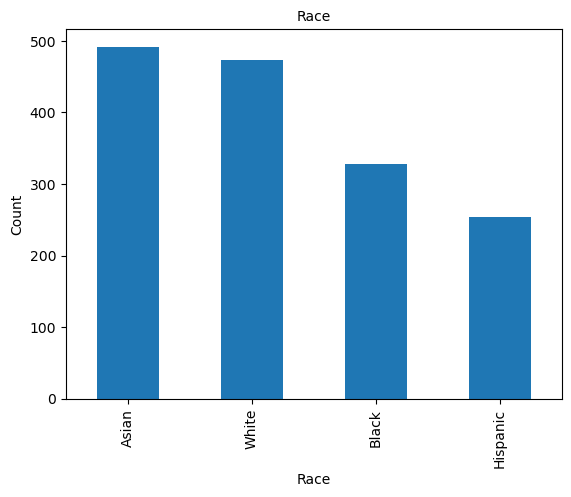

In [119]:
data_copy['Race'].value_counts().plot(kind='bar')
plt.title("Race", fontsize = 10)
plt.xlabel("Race", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

In terms of race, Whites have the highest drug usage.

## 6. Users by Race and Gender

Text(0.5, 1.0, 'Users by Race and Gender')

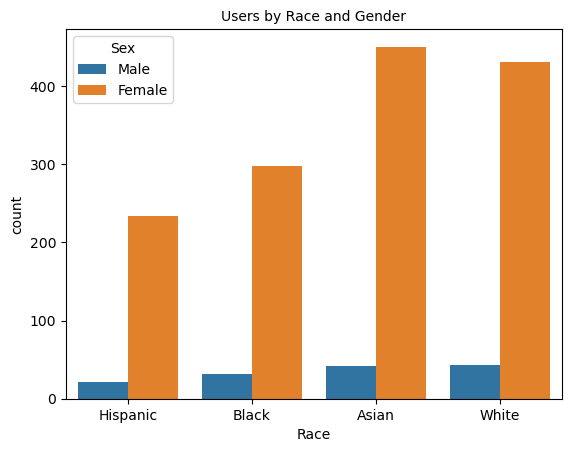

In [120]:
sns.countplot(x='Race',hue='Sex',data=data_copy)
plt.title("Users by Race and Gender", fontsize = 10)

Female users constituted the majority across all races, with a significant presence in each group.

## 7. Users by Age and Gender

Text(0.5, 1.0, 'Users by Age and Gender')

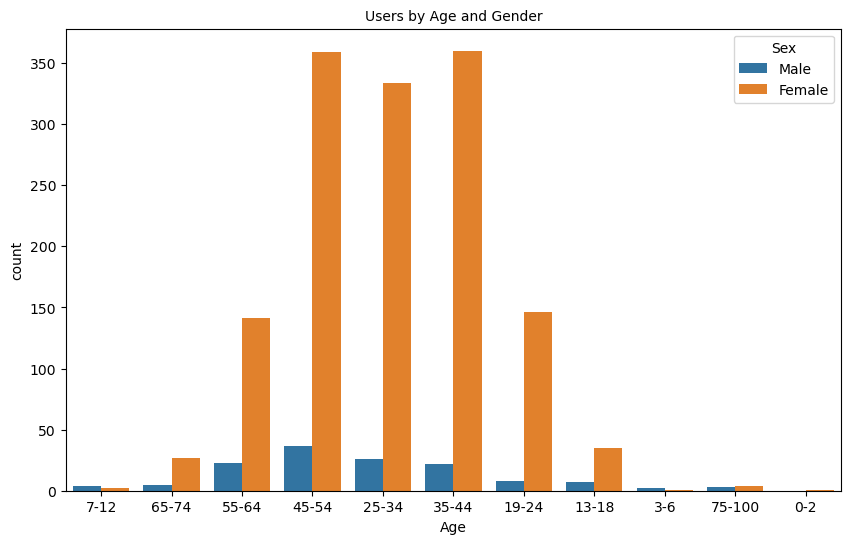

In [121]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=data_copy)
plt.title("Users by Age and Gender", fontsize = 10)


Females remained the predominant user group across all age categories spanning from 12 to 75 years. Additionally, individuals within the age brackets of 35-44, 45-54, and 25-34 demonstrated the highest utilization of Topamax.

## 8. Correlation Heatmap

<Axes: >

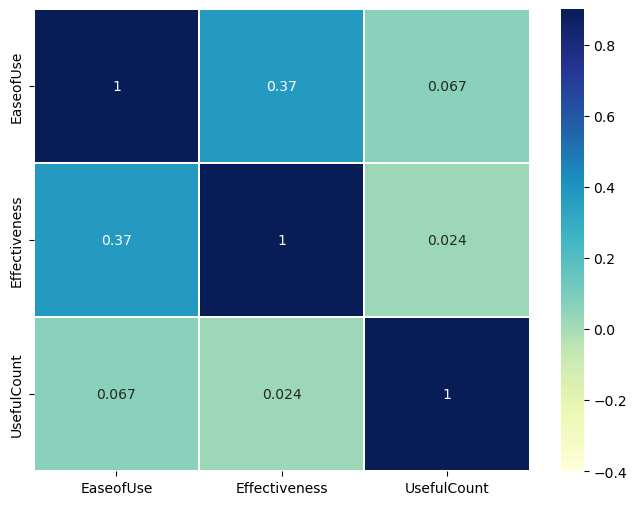

In [122]:
corrmatrix = data_copy.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corrmatrix,vmin=-0.4 , vmax=0.9, annot=True, cmap='YlGnBu' , linewidth=0.2)

Variables are weakly or moderately correlated to each other.

## 9. Yearly Reviews - Topamax

In [123]:
data_copy['Date'] = pd.to_datetime(data_copy['Date'], errors = 'coerce')

In [124]:
#extracting year from Date
data_copy['Year'] = data_copy['Date'].dt.year

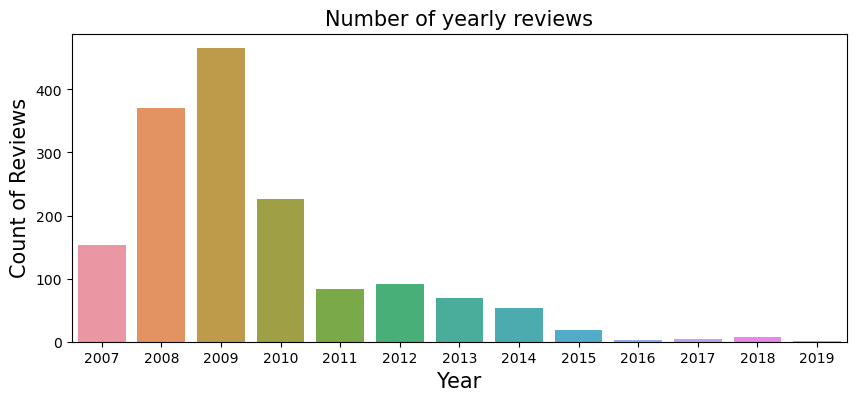

In [125]:

plt.figure(figsize=(10, 4))
sns.countplot(x='Year', data=data_copy)
plt.title('Number of yearly reviews', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count of Reviews', fontsize=15)
plt.show()

Topamax’s yearly reviews peaked in 2009 and tapered thereafter.

## 10. Effectiveness

Text(0, 0.5, 'Count')

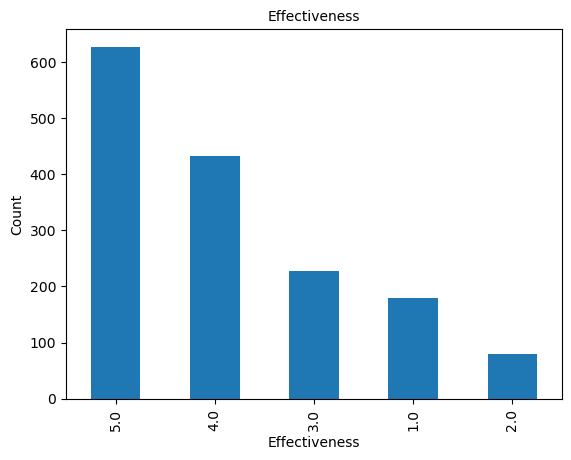

In [126]:
data_copy['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness", fontsize = 10)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

Most users found Topamax highly effective

## 11. Ease of Use

Text(0, 0.5, 'Count')

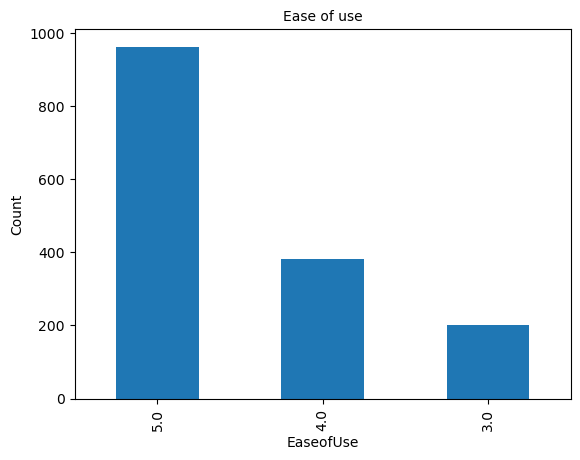

In [127]:
data_copy['EaseofUse'].value_counts().plot(kind='bar')
plt.title("Ease of use", fontsize = 10)
plt.xlabel("EaseofUse", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

Topamax received high ratings from most users for ease of use.

## 12. Useful Count

Text(0, 0.5, 'Count')

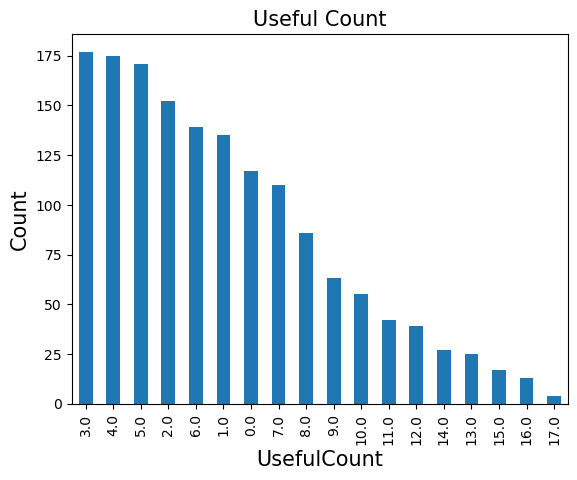

In [128]:
data_copy['UsefulCount'].value_counts().plot(kind='bar')
plt.title("Useful Count", fontsize = 15)
plt.xlabel("UsefulCount", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

Regarding the helpfulness of reviews, Topamax users have varying opinions, with the majority not finding the reviews paricularly useful

## 13. Users by Effectiveness and Gender

<Figure size 1000x800 with 0 Axes>

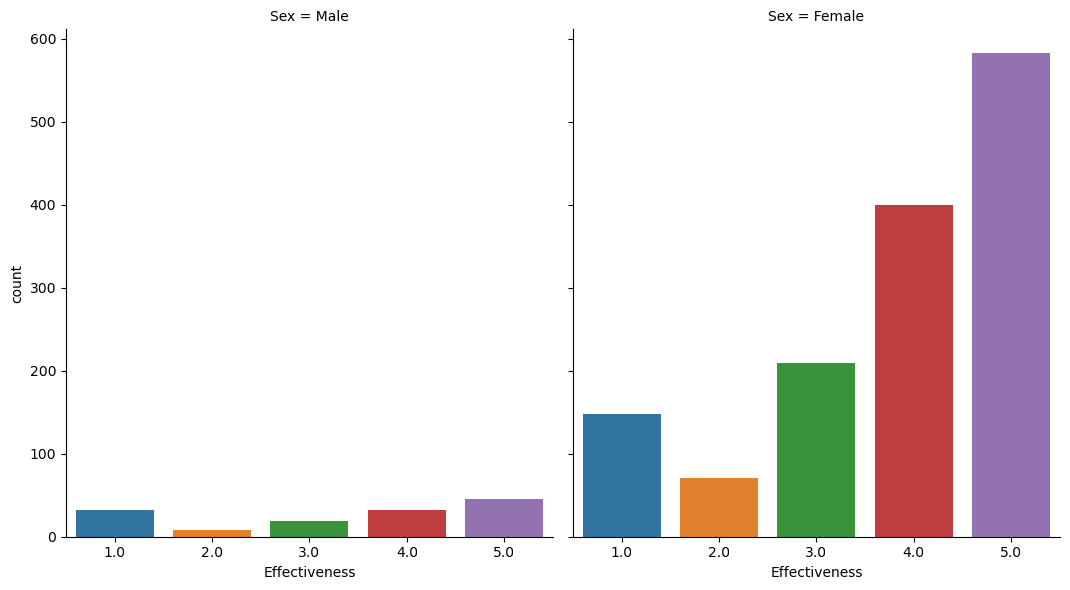

In [129]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=data_copy, kind="count",
                height=6,aspect =.9);

Topamax is found to be highly effective in females

## 14. Side Effects

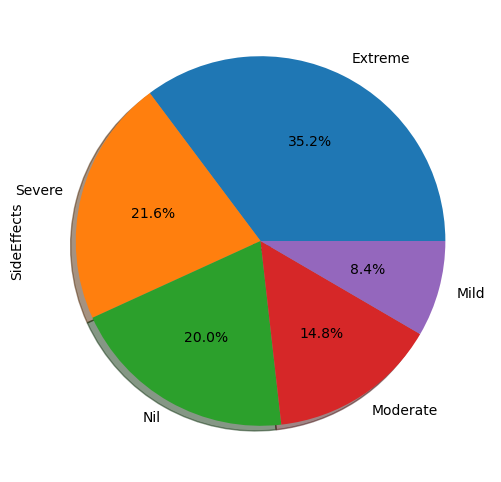

In [130]:
plt.figure(figsize=(6,6))
data_copy['SideEffects'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

The highest number of cases were associated with extremely severe side effects, closely followed by no side effects, while mild symptoms were the least reported.

## 15. Side Effects and Age

<Axes: xlabel='Age', ylabel='count'>

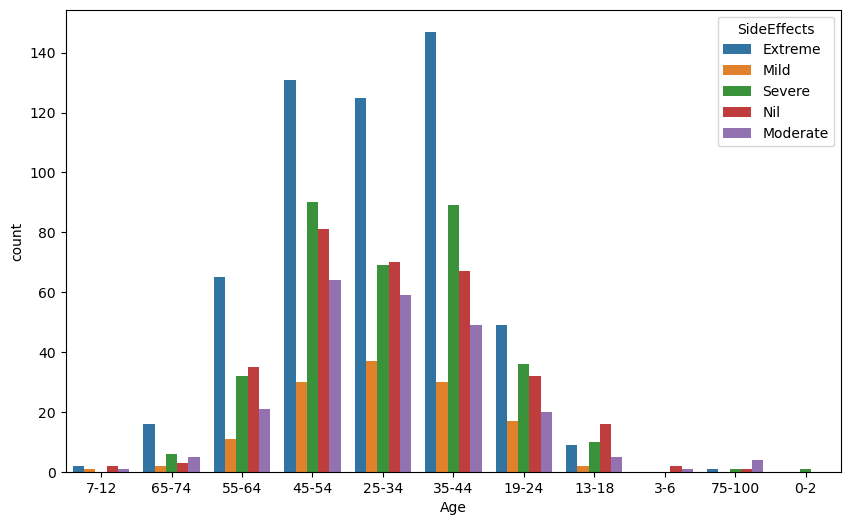

In [131]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='SideEffects',data=data_copy)

In individuals under 24, no side effects were the most common. For those aged 35-44, 25-34, 45-54, 65-74, and 55-64, extremely severe side effects were prevalent.

## 16. Side Effects and Gender

<Figure size 2000x1000 with 0 Axes>

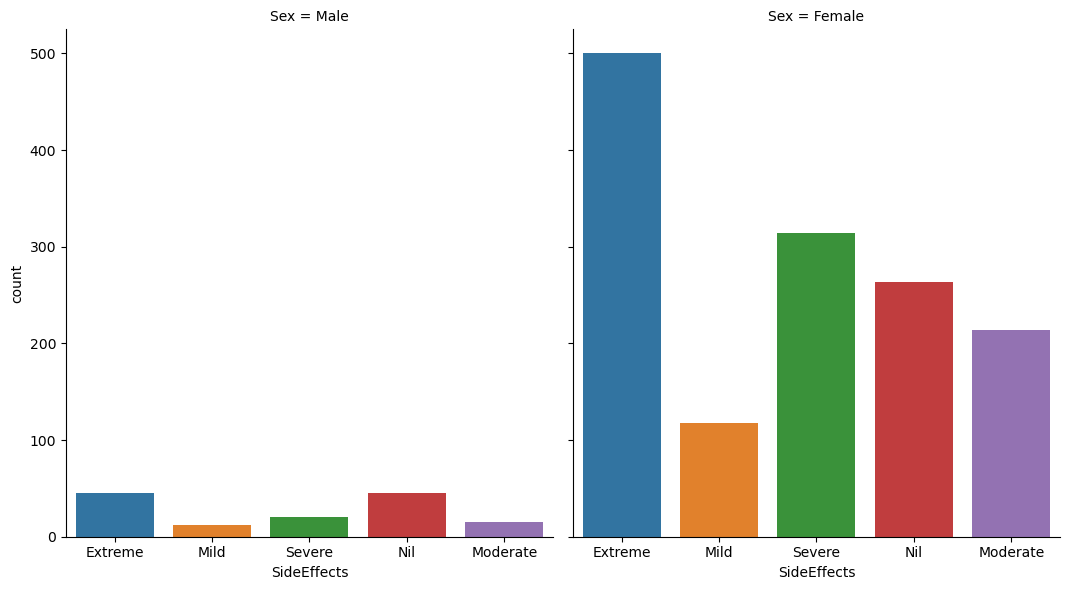

In [132]:
plt.figure(figsize=(20,10))

g = sns.catplot(x="SideEffects",col="Sex",data=data_copy, kind="count",height=6,aspect =.9);

Females experienced more severe side effects, while men reported no side effects most frequently.

## 17. Side Effects and Race

<Axes: xlabel='Race', ylabel='count'>

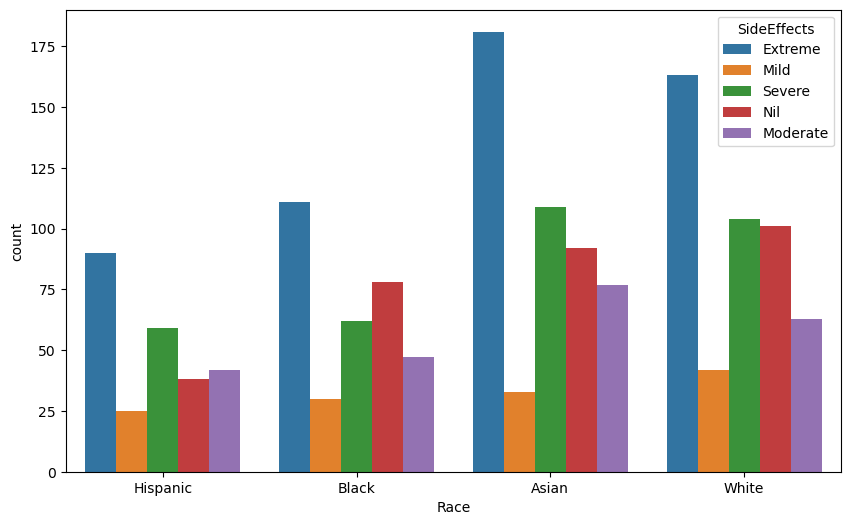

In [133]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race',hue='SideEffects',data=data_copy)

Side effects proved race neutral with proportionate results.

# Splitting the Data

In [134]:
#target
y = data_new['SideEffects']

In [135]:
X = data_new.drop(['SideEffects'],axis=1)

In [136]:
X.shape

(1547, 6)

# Splitting Data into Train and Test Sets

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2)#assigninng values

In [138]:
X_train.shape

(1237, 6)

In [139]:
X_test.shape

(310, 6)

In [140]:
y_train.shape

(1237,)

In [141]:
y_test.shape

(310,)

# Modelling

## 1. Logistic Regression Model

In [142]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(multi_class='multinomial')
logit_model.fit(X_train, y_train)
y_pred = logit_model.predict(X_test)

In [143]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score,classification_report

### Performance Evaluation

In [144]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  55.483870967741936


### Confusion Matrix

In [145]:
confusion_matrix(y_test,y_pred)

array([[90,  0,  1,  0, 17],
       [ 1,  0,  4, 15,  6],
       [10,  1,  7, 16, 19],
       [ 7,  0,  5, 41, 10],
       [15,  0,  4,  7, 34]], dtype=int64)

## 2. KNN Model

In [146]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
acc_values = []
neighbors = np.arange(3,15)

# creating a loop to create KNN model for each K value
for k in neighbors:
#taking the instance of KNN to a variable.the variable name is classifier.
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski')    #no: of neighbors n the methode to measure the distance .instance is created
#we have to create the model.
    classifier = KNeighborsClassifier(n_neighbors= k)
    classifier.fit(X_train,y_train)
#have to predict output using this model.
    y_pred = classifier.predict(X_test)#KNN is created
#append the accurcy values to empty list in order to fing out maximum accuracy.
    acc = accuracy_score(y_test, y_pred)#taking accuracy values to variable acc 
#append these accuracy values to our list
    acc_values.append(acc)

In [148]:
acc_values

[0.4935483870967742,
 0.5193548387096775,
 0.5193548387096775,
 0.535483870967742,
 0.5193548387096775,
 0.5193548387096775,
 0.5,
 0.535483870967742,
 0.532258064516129,
 0.532258064516129,
 0.532258064516129,
 0.5516129032258065]

A graph is plotted to determine the k value with the highest accuracy, showing the relationship between k values (number of neighbors) and accuracy values.

Text(0, 0.5, 'accuracy')

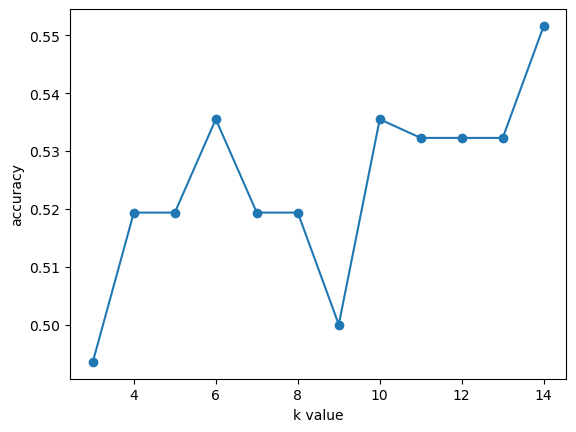

In [149]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

### KNN Model with k = 14

In [174]:
classifier = KNeighborsClassifier(n_neighbors= 14, metric = 'minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

### Performance Evaluation

In [175]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  55.16129032258065


### Confusion Matrix

In [176]:
confusion_matrix(y_test,y_pred)

array([[93,  1,  0,  0, 14],
       [ 3,  6,  3,  8,  6],
       [14,  5,  8,  6, 20],
       [10,  5, 10, 29,  9],
       [18,  0,  6,  1, 35]], dtype=int64)

## 3. Decision Tree Classifier

In [153]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

### Performance Evaluation

In [154]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  51.61290322580645


### Confusion Matrix 

In [155]:
confusion_matrix(y_test,y_pred)

array([[87,  1,  4,  0, 16],
       [ 2,  7,  6,  8,  3],
       [12, 10, 10, 11, 10],
       [ 9, 10,  8, 32,  4],
       [17,  5,  9,  5, 24]], dtype=int64)

## 4. Support Vector Machine

### 4.1 Linear SVM

In [156]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear')#creating an instance
svm_linear.fit(X_train,y_train)
y_pred = svm_linear.predict(X_test)

### Performance Evaluation

In [157]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  56.451612903225815


### Confusion Matrix

In [158]:
confusion_matrix(y_test,y_pred)

array([[88,  0,  1,  0, 19],
       [ 1,  2,  7, 10,  6],
       [ 7,  1, 15,  8, 22],
       [ 6,  3,  9, 34, 11],
       [14,  0,  9,  1, 36]], dtype=int64)

### 4.2 Polynomial SVM

In [159]:
svm_poly = SVC(kernel = 'poly', degree=3)
svm_poly.fit(X_train,y_train)
y_pred = svm_poly.predict(X_test)

### Performance Evaluation

In [160]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  52.25806451612903


### Confusion Matrix

In [161]:
confusion_matrix(y_test,y_pred)

array([[88,  0,  0,  0, 20],
       [ 1,  0,  7, 11,  7],
       [ 9,  0,  8, 11, 25],
       [ 8,  0,  9, 30, 16],
       [16,  0,  5,  3, 36]], dtype=int64)

### 4.3 Radial SVM

In [162]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)
y_pred=svm_radial.predict(X_test)

### Performance Evaluation

In [163]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  55.16129032258065


### Confusion Matrix

In [164]:
confusion_matrix(y_test,y_pred)

array([[95,  0,  0,  0, 13],
       [ 2,  0,  4, 10, 10],
       [11,  0,  5,  5, 32],
       [ 7,  0,  6, 32, 18],
       [17,  0,  3,  1, 39]], dtype=int64)

## 5. Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
#training the model
rf.fit(X_train,y_train)
#to make predictions
y_pred=rf.predict(X_test)

### Performance Evaluation

In [166]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  51.61290322580645


### Confusion Matrix

In [167]:
confusion_matrix(y_test,y_pred)

array([[84,  1,  4,  0, 19],
       [ 2,  3,  7, 10,  4],
       [10,  7, 10, 14, 12],
       [ 5,  4,  9, 36,  9],
       [15,  4,  9,  5, 27]], dtype=int64)

## 6. Gradient Boosting

In [178]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

### Performance Evaluation

In [179]:
print('Accuracy is: ',accuracy_score(y_test,y_pred)*100)

Accuracy is:  56.774193548387096


### Confusion Matrix

In [180]:
confusion_matrix(y_test,y_pred)

array([[89,  1,  1,  0, 17],
       [ 1,  4,  7, 10,  4],
       [11,  4, 15,  8, 15],
       [ 6,  4, 10, 33, 10],
       [13,  1,  6,  5, 35]], dtype=int64)

## Feature Importance

In [183]:
pd.Series(gb.feature_importances_,index=X.columns).sort_values(ascending=False)*100

Effectiveness    76.193311
EaseofUse         7.821203
Condition         5.806407
Age               5.675889
Race              3.234123
Sex               1.269067
dtype: float64

## Fine Tuning of Hyper Parameters

In [184]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [185]:
from sklearn.model_selection import GridSearchCV

# Create the GradientBoostingClassifier
gb = GradientBoostingClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be used
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
# Use the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [186]:
print("Accuracy is : ", accuracy_score(y_test, y_pred)*100)

Accuracy is :  58.06451612903226


## 7. Extreme Gradient Boosting

In [171]:
from xgboost import XGBClassifier
#creating an instance
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred= xgb.predict(X_test)

### Performance Evaluation

In [172]:
print('Accuracy is: ',accuracy_score(y_test,y_pred)*100)

Accuracy is:  53.5483870967742


### Confusion Matrix

In [173]:
confusion_matrix(y_test,y_pred)

array([[84,  1,  5,  1, 17],
       [ 2,  5,  7,  9,  3],
       [11,  7, 12,  8, 15],
       [ 6,  6,  9, 33,  9],
       [14,  2,  5,  7, 32]], dtype=int64)

## Inference

Accuracies of each classification models

1. Logistic Regression Model - 55.48
2. KNN Model - 55.16
3. Decision Tree Classifier - 51.62
4. Support Vector Machine
   Linear SVM - 56.45
   Polynomial SVM - 52.25
   Radial SVM - 55.16
5. Random Forest - 51.61
6. Gradient Boosting - 56.77
7. Extreme Gradient Boosting - 53.54

Gradient Boosting after Fine tuning - 58.06

The classification model that demonstrated the best performance was the Gradient Boosting model, and this result was achieved after fine-tuning its hyperparameters. The model's performance was evaluated, and it reached an impressive maximum accuracy of 58.06%. This accuracy rate underscores the effectiveness of the model in categorizing the side effects of the drug based on various factors such as age, race, and gender.